<a href="https://colab.research.google.com/github/r021n/simple-machine-learing/blob/main/California_Home_Price_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fase 1: Eksplorasi & Pemahaman Data

## Memuat Dataset

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)
df["HargaRumah"] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HargaRumah
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Melihat Struktur Data

In [2]:
print("Bentuk data:", df.shape)
print()

print(df.info())

Bentuk data: (20640, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   HargaRumah  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


## Memahami Arti Setiap Fitur

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## Statistik Dasar

In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HargaRumah
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Cek Nilai yang Hilang

In [5]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HargaRumah    0
dtype: int64


## Melihat Sebaran Target (Harga Rumah)

In [6]:
print("Rata-rata harga:", df['HargaRumah'].mean())
print("Harga terendah:", df['HargaRumah'].min())
print("Harga tertinggi:", df['HargaRumah'].max())
print("Median harga:", df['HargaRumah'].median())
print("Standar deviasi:", df['HargaRumah'].std())

Rata-rata harga: 2.068558169089147
Harga terendah: 0.14999
Harga tertinggi: 5.00001
Median harga: 1.797
Standar deviasi: 1.1539561587441483


# Fase 2: Visualisasi & Analisis Hubungan Antar Fitur

## Histogram Semua Fitur

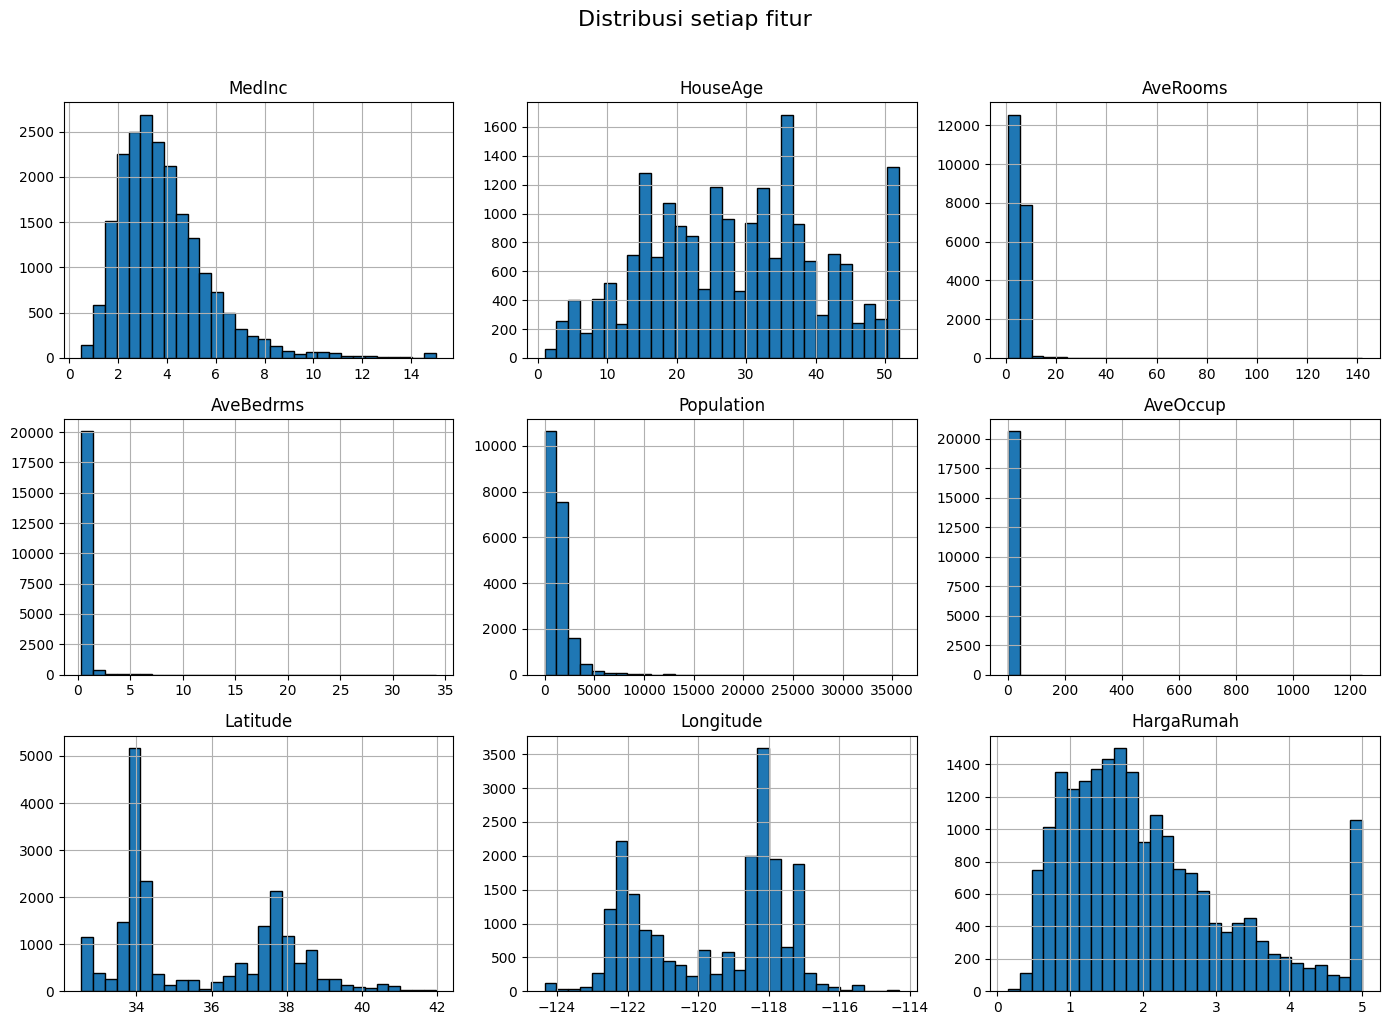

In [7]:
import matplotlib.pyplot as plt

df.hist(figsize=(14, 10), bins=30, edgecolor="black")
plt.suptitle("Distribusi setiap fitur", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Scatter Plot Fitur vs Harga Rumah

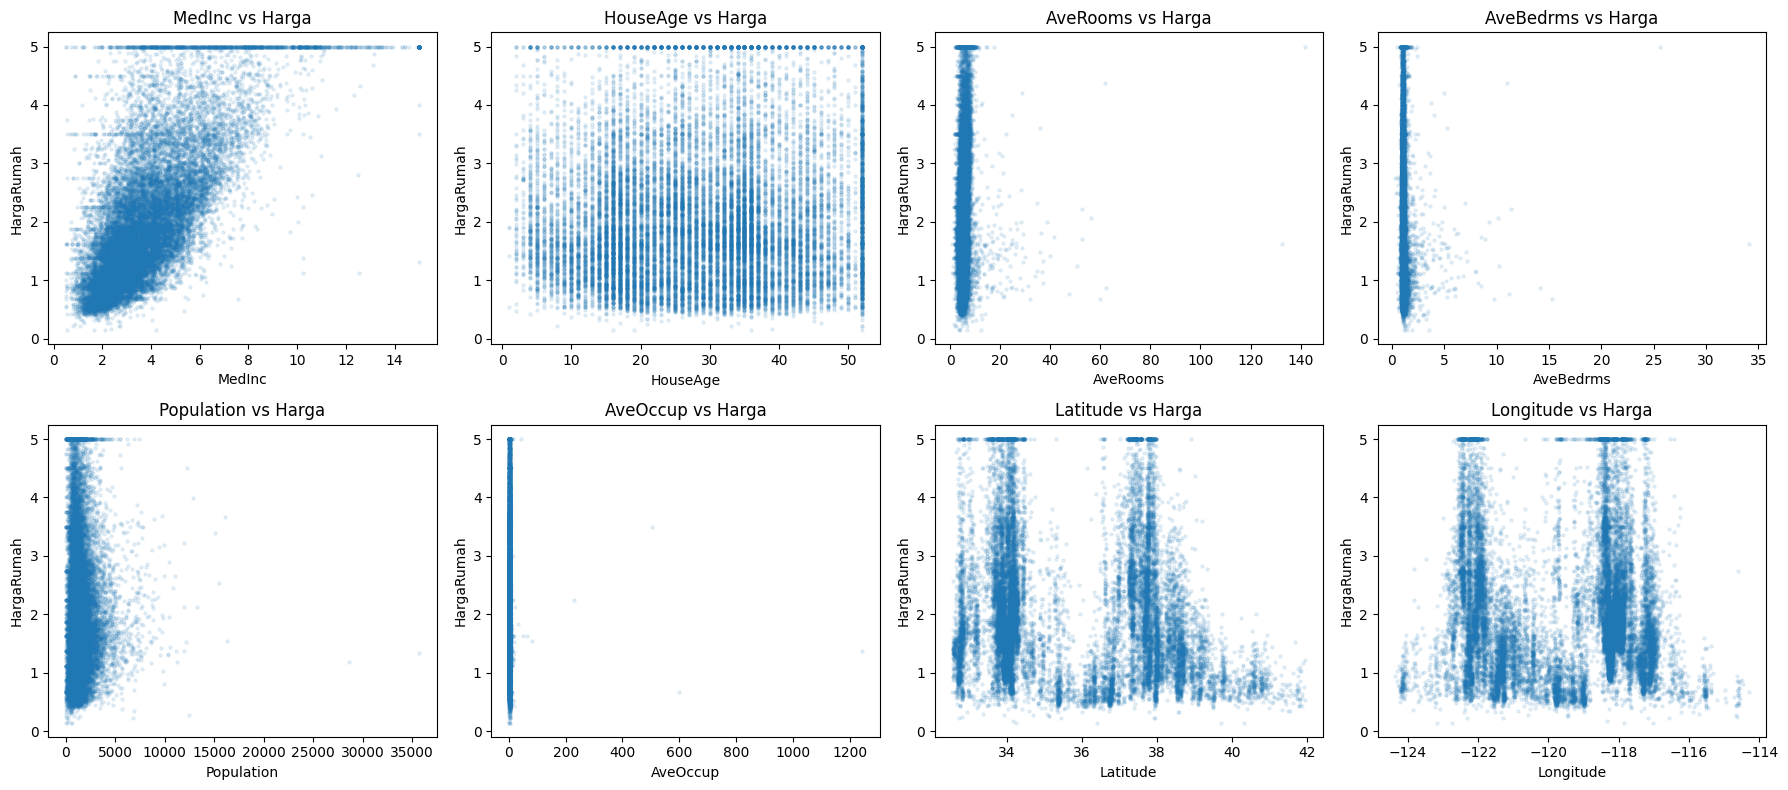

In [8]:
fitur_list = df.columns[:-1]

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, fitur in enumerate(fitur_list):
  axes[i].scatter(df[fitur], df['HargaRumah'], alpha=0.1, s=5)
  axes[i].set_xlabel(fitur)
  axes[i].set_ylabel('HargaRumah')
  axes[i].set_title(f'{fitur} vs Harga')

plt.tight_layout()
plt.show()

##  Matriks Korelasi

In [9]:
korelasi = df.corr()

print("Korelasi terhadap HargaRumah:\n")
print(korelasi["HargaRumah"].sort_values(ascending=False))

Korelasi terhadap HargaRumah:

HargaRumah    1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: HargaRumah, dtype: float64


## Heatmap Korelasi

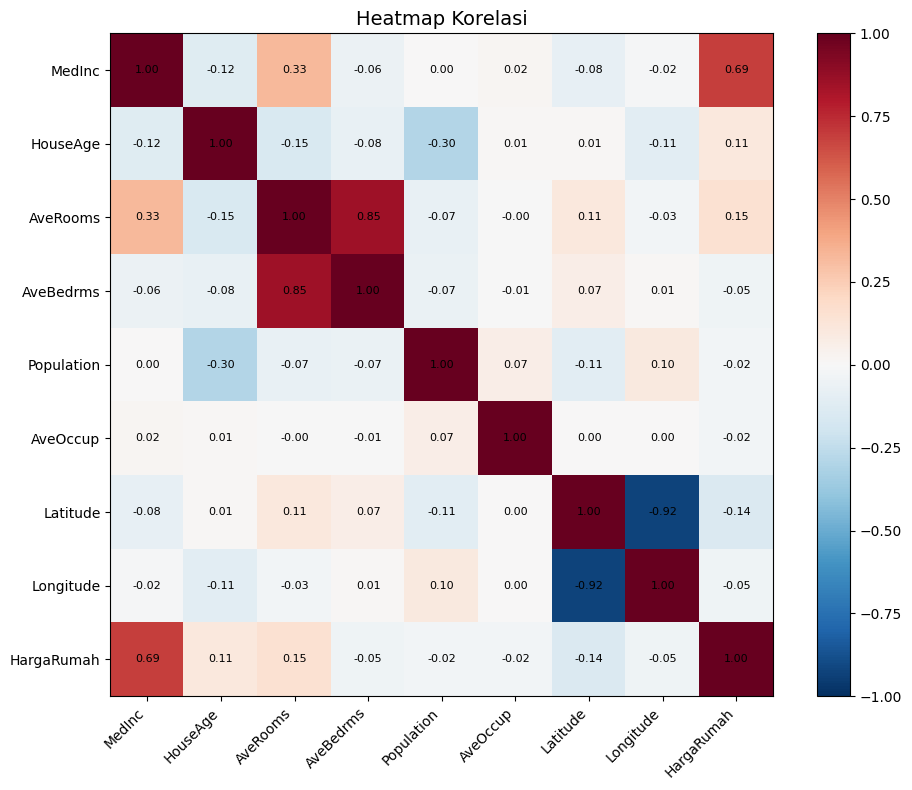

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

im = ax.imshow(korelasi.values, cmap='RdBu_r', vmin=-1, vmax=1)

ax.set_xticks(range(len(korelasi.columns)))
ax.set_yticks(range(len(korelasi.columns)))
ax.set_xticklabels(korelasi.columns, rotation=45, ha='right')
ax.set_yticklabels(korelasi.columns)

for i in range(len(korelasi)):
  for j in range(len(korelasi)):
    ax.text(j, i, f'{korelasi.values[i, j]:.2f}',
            ha='center', va='center', fontsize=8)

plt.colorbar(im)
plt.title('Heatmap Korelasi', fontsize=14)
plt.tight_layout()
plt.show()

## Scatter Plot Fokus pada Fitur Paling Berkorelasi

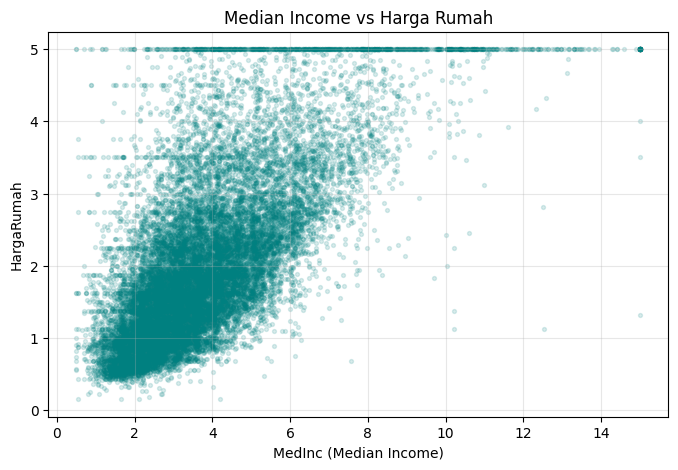

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(df['MedInc'], df['HargaRumah'], alpha=0.15, s=8, color='teal')
plt.xlabel('MedInc (Median Income)')
plt.ylabel('HargaRumah')
plt.title('Median Income vs Harga Rumah')
plt.grid(True, alpha=0.3)
plt.show()

# Fase 3: Persiapan Data (Preprocessing & Feature Engineering)

## Feature Engineering - Membuat Fitur Baru

In [12]:
import numpy as np

df['KamarPerRumahTangga'] = df['AveRooms']
df['BedroomRatio'] = df['AveBedrms'] / df['AveRooms']
df['OrangPerRumahTangga'] = df['AveOccup']

print("Kolom setelah feature engineering:")
print(df.columns.tolist())
print(f"\nJumlah fitur sekarang: {df.shape[1] - 1} fitur + 1 target")

Kolom setelah feature engineering:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'HargaRumah', 'KamarPerRumahTangga', 'BedroomRatio', 'OrangPerRumahTangga']

Jumlah fitur sekarang: 11 fitur + 1 target


## Menangani Outlier Sederhana

In [13]:
print("Sebelum clip:")
print(f"  AveRooms max: {df['AveRooms'].max():.1f}")
print(f"  AveOccup max: {df['AveOccup'].max():.1f}")
print(f"  Population max: {df['Population'].max():.1f}")

kolom_clip = ['AveRooms', 'AveBedrms', 'AveOccup', 'Population',
              'KamarPerRumahTangga', 'OrangPerRumahTangga']

for kolom in kolom_clip:
  batas_atas = df[kolom].quantile(0.99)
  df[kolom] = df[kolom].clip(upper=batas_atas)

print("\nSetelah clip:")
print(f"  AveRooms max: {df['AveRooms'].max():.1f}")
print(f"  AveOccup max: {df['AveOccup'].max():.1f}")
print(f"  Population max: {df['Population'].max():.1f}")

Sebelum clip:
  AveRooms max: 141.9
  AveOccup max: 1243.3
  Population max: 35682.0

Setelah clip:
  AveRooms max: 10.4
  AveOccup max: 5.4
  Population max: 5805.8


## Memisahkan Fitur dan Target

In [14]:
X = df.drop('HargaRumah', axis=1).values
y = df['HargaRumah'].values

fitur_names = df.drop('HargaRumah', axis=1).columns.tolist()

print(f"Bentuk X: {X.shape}")
print(f"Bentuk y: {y.shape}")
print(f"\nNama fitur: {fitur_names}")

Bentuk X: (20640, 11)
Bentuk y: (20640,)

Nama fitur: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'KamarPerRumahTangga', 'BedroomRatio', 'OrangPerRumahTangga']


## Membagi Data Latih dan Data Uji (Manual)

In [15]:
np.random.seed(42)
indices = np.random.permutation(len(X))

batas = int(0.8 * len(X))

train_idx = indices[:batas]
test_idx = indices[batas:]

X_train = X[train_idx]
X_test = X[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

print(f"Data latih: {X_train.shape[0]} baris")
print(f"Data uji:   {X_test.shape[0]} baris")

Data latih: 16512 baris
Data uji:   4128 baris


## Feature Scaling Manual (Standardisasi)

In [16]:
mean_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_train) / std_train
X_test_scaled = (X_test - mean_train) / std_train

print("Setelah scaling (data latih):")
print(f"  Mean tiap fitur:  {np.round(X_train_scaled.mean(axis=0), 4)}")
print(f"  Std tiap fitur:   {np.round(X_train_scaled.std(axis=0), 4)}")

Setelah scaling (data latih):
  Mean tiap fitur:  [-0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.]
  Std tiap fitur:   [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Verifikasi Akhir

In [17]:
print("=== RINGKASAN DATA SIAP PAKAI ===")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_test_scaled:  {X_test_scaled.shape}")
print(f"y_train:        {y_train.shape}")
print(f"y_test:         {y_test.shape}")
print(f"\nJumlah fitur:   {len(fitur_names)}")
print(f"Nama fitur:     {fitur_names}")
print(f"\nContoh X_train_scaled baris pertama:")
print(np.round(X_train_scaled[0], 3))

=== RINGKASAN DATA SIAP PAKAI ===
X_train_scaled: (16512, 11)
X_test_scaled:  (4128, 11)
y_train:        (16512,)
y_test:         (4128,)

Jumlah fitur:   11
Nama fitur:     ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'KamarPerRumahTangga', 'BedroomRatio', 'OrangPerRumahTangga']

Contoh X_train_scaled baris pertama:
[-1.155 -0.291 -0.854 -0.334 -0.009  1.297  0.204  0.277 -0.854  0.529
  1.297]


# Fase 4: Membangun Linear Regression dari Nol

## Memahami Konsep Linear Regression

In [18]:
X_train_b = np.column_stack([np.ones(X_train_scaled.shape[0]), X_train_scaled])
X_test_b = np.column_stack([np.ones(X_test_scaled.shape[0]), X_test_scaled])

print(f"X_train_b bentuk: {X_train_b.shape}  (kolom pertama adalah bias)")
print(f"Contoh 3 baris pertama, 3 kolom pertama:")
print(X_train_b[:3, :3])

X_train_b bentuk: (16512, 12)  (kolom pertama adalah bias)
Contoh 3 baris pertama, 3 kolom pertama:
[[ 1.         -1.15453971 -0.29052552]
 [ 1.         -0.7062249   0.10661646]
 [ 1.         -0.20585896  1.85404119]]
